Dataset saved as credit_data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      8 non-null      int64  
 1   Age                     8 non-null      int64  
 2   Income                  8 non-null      int64  
 3   Loan Amount             8 non-null      int64  
 4   Credit History (Years)  8 non-null      int64  
 5   Debt-to-Income Ratio    8 non-null      float64
 6   Late Payments           8 non-null      int64  
 7   Credit Score Category   8 non-null      object 
dtypes: float64(1), int64(6), object(1)
memory usage: 644.0+ bytes

Dataset Overview:
 None

Missing Values:
 ID                        0
Age                       0
Income                    0
Loan Amount               0
Credit History (Years)    0
Debt-to-Income Ratio      0
Late Payments             0
Credit Score Category     0
dty

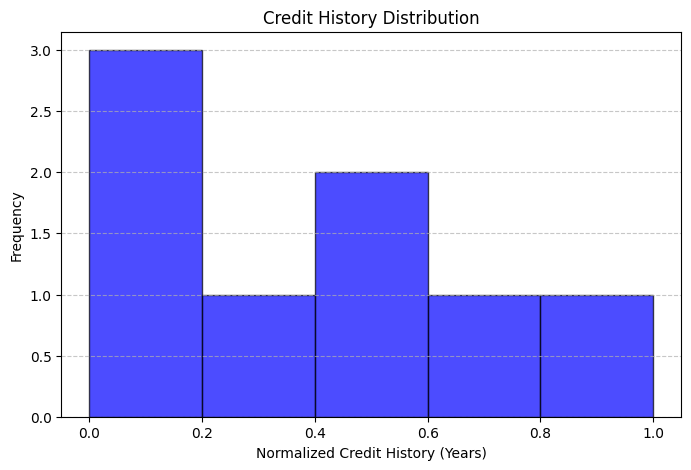

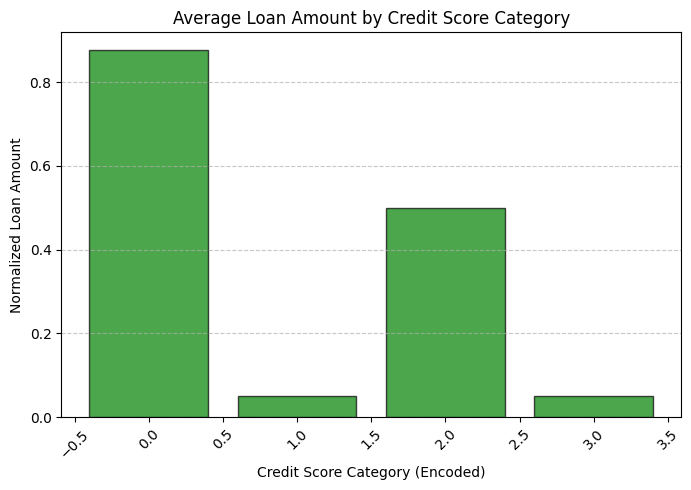

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Create Sample Dataset
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8],
    "Age": [25, 40, 35, 50, 30, 45, 28, 55],
    "Income": [45000, 80000, 60000, 100000, 50000, 90000, 48000, 120000],
    "Loan Amount": [10000, 25000, 15000, 40000, 12000, 35000, 11000, 50000],
    "Credit History (Years)": [2, 10, 7, 15, 5, 12, 3, 20],
    "Debt-to-Income Ratio": [0.35, 0.25, 0.30, 0.20, 0.32, 0.22, 0.33, 0.18],
    "Late Payments": [1, 0, 1, 0, 2, 0, 1, 0],
    "Credit Score Category": ["Fair", "Good", "Fair", "Excellent", "Poor", "Good", "Fair", "Excellent"]
}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save to CSV
csv_file = "credit_data.csv"
df.to_csv(csv_file, index=False)

print(f"Dataset saved as {csv_file}")

# Step 2: Load Data
df = pd.read_csv(csv_file)

# Display basic information
print("\nDataset Overview:\n", df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Step 3: Data Cleaning - Handle Missing Values Only for Numeric Columns
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Step 4: Encode Categorical Column (Credit Score Category)
label_encoder = LabelEncoder()
df["Credit Score Category"] = label_encoder.fit_transform(df["Credit Score Category"])

print("\nEncoded Credit Score Categories:\n", df["Credit Score Category"].unique())

# Step 5: Normalize Numerical Data (Min-Max Scaling)
scaler = MinMaxScaler()
numeric_cols = ["Age", "Income", "Loan Amount", "Credit History (Years)", "Debt-to-Income Ratio", "Late Payments"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nNormalized Data:\n", df.head())

# Step 6: Plot Data Distributions

# Histogram for Credit History
plt.figure(figsize=(8, 5))
plt.hist(df["Credit History (Years)"], bins=5, color="blue", edgecolor="black", alpha=0.7)
plt.title("Credit History Distribution")
plt.xlabel("Normalized Credit History (Years)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar Chart for Average Loan Amount by Credit Score Category
categories = df["Credit Score Category"].unique()
avg_loan = [df[df["Credit Score Category"] == cat]["Loan Amount"].mean() for cat in categories]

plt.figure(figsize=(8, 5))
plt.bar(categories, avg_loan, color="green", edgecolor="black", alpha=0.7)
plt.title("Average Loan Amount by Credit Score Category")
plt.xlabel("Credit Score Category (Encoded)")
plt.ylabel("Normalized Loan Amount")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()